<a href="https://colab.research.google.com/github/vsvale/AUTOML/blob/main/TPOT_wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install deap update_checker tqdm stopit xgboost
!pip install dask[delayed] dask[dataframe] dask-ml fsspec>=0.3.3 distributed>=2.10.0
!pip install scikit-mdr skrebate
!pip install tpot
!pip install joblib
!pip install dask distributed
!pip install mlxtend

In [2]:
from tpot import TPOTClassifier

In [3]:
estimator = TPOTClassifier(n_jobs=-1)

In [4]:
!git clone https://github.com/vsvale/Building-Machine-Learning-Models-in-Spark-2.git

Cloning into 'Building-Machine-Learning-Models-in-Spark-2'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [5]:
import pandas as pd

In [6]:
%cd Building-Machine-Learning-Models-in-Spark-2
%cd datasets

/content/Building-Machine-Learning-Models-in-Spark-2
/content/Building-Machine-Learning-Models-in-Spark-2/datasets


In [7]:
df = pd.read_csv('wine.data',header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [11]:
import joblib

In [12]:
estimator.fit(x_train, y_train)

TPOTClassifier(n_jobs=-1)

In [13]:
print(estimator.score(x_test, y_test))

0.9814814814814815


In [14]:
estimator.export('tpot_wine.py')

In [15]:
f = open("tpot_wine.py", "r")
print(f.read())

import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=None)

# Average CV score on the training set was: 0.992
exported_pipeline = GradientBoostingClassifier(learning_rate=0.5, max_depth=8, max_features=0.45, min_samples_leaf=16, min_samples_split=10, n_estimators=100, subsample=0.9500000000000001)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



In [16]:
y_pred = estimator.predict(x_test)

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      0.96      0.98        24
           3       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



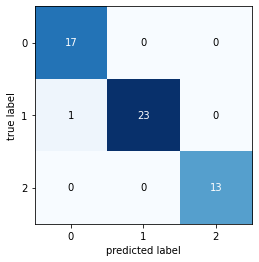

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()